### Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

## Exercise 1

- Download at least 2 weeks worth of [MTA turnstile data](http://web.mta.info/developers/turnstile.html) (You can do this manually or via Python)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }

*Store all the weeks in a data structure of your choosing*

In [ ]:

#what is the difference between urllib.retrieve urllib.urlopen and requests.get
url='http://web.mta.info/developers/data/nyct/turnstile/turnstile_170408.txt'
url2='http://web.mta.info/developers/data/nyct/turnstile/turnstile_170415.txt'
#import urllib.request
#txt = urllib.request.urlopen(url).read()

import requests

def download(url, file_name):
    with open(file_name, "ab") as file:
        response = requests.get(url)
        file.write(response.content)
        file.close()                
                
download(url, 'dataApril.txt')
download(url2, 'dataApril.txt')

In [1]:
import csv
reader = csv.reader(open('dataApril.txt'))

In [2]:
result = {}

for row in reader:
    
    key = tuple(row[0:4])
    if key not in result:
        result[key] = []
    result[key].append(row[4:])


In [3]:
print(len(result))
i=0
for k,v in result.items():
    if i<2:
        print(k)
        print(v)
    i=i+1


4698
('R262B', 'R195', '05-00-03', '161/YANKEE STAD')
[['4BD', 'IRT', '04/01/2017', '00:22:00', 'REGULAR', '0000175051', '0000122051                                     '], ['4BD', 'IRT', '04/01/2017', '04:22:00', 'REGULAR', '0000175051', '0000122051                                     '], ['4BD', 'IRT', '04/01/2017', '08:22:00', 'REGULAR', '0000175051', '0000122051                                     '], ['4BD', 'IRT', '04/01/2017', '12:22:00', 'REGULAR', '0000175051', '0000122051                                     '], ['4BD', 'IRT', '04/01/2017', '16:22:00', 'REGULAR', '0000175143', '0000122096                                     '], ['4BD', 'IRT', '04/01/2017', '20:22:00', 'REGULAR', '0000175171', '0000122098                                     '], ['4BD', 'IRT', '04/02/2017', '00:22:00', 'REGULAR', '0000175171', '0000122098                                     '], ['4BD', 'IRT', '04/02/2017', '04:22:00', 'REGULAR', '0000175171', '0000122098                                     '], [

In [4]:
for k,v in result.items():
    for items in v:
        last_item=items.pop()
        items.append(last_item.replace(' ',''))

In [5]:
i=0
for k,v in result.items():
    if i<2:
        print(k)
        print(v)
    i=i+1


('R262B', 'R195', '05-00-03', '161/YANKEE STAD')
[['4BD', 'IRT', '04/01/2017', '00:22:00', 'REGULAR', '0000175051', '0000122051'], ['4BD', 'IRT', '04/01/2017', '04:22:00', 'REGULAR', '0000175051', '0000122051'], ['4BD', 'IRT', '04/01/2017', '08:22:00', 'REGULAR', '0000175051', '0000122051'], ['4BD', 'IRT', '04/01/2017', '12:22:00', 'REGULAR', '0000175051', '0000122051'], ['4BD', 'IRT', '04/01/2017', '16:22:00', 'REGULAR', '0000175143', '0000122096'], ['4BD', 'IRT', '04/01/2017', '20:22:00', 'REGULAR', '0000175171', '0000122098'], ['4BD', 'IRT', '04/02/2017', '00:22:00', 'REGULAR', '0000175171', '0000122098'], ['4BD', 'IRT', '04/02/2017', '04:22:00', 'REGULAR', '0000175171', '0000122098'], ['4BD', 'IRT', '04/02/2017', '08:22:00', 'REGULAR', '0000175172', '0000122098'], ['4BD', 'IRT', '04/02/2017', '12:22:00', 'REGULAR', '0000175172', '0000122098'], ['4BD', 'IRT', '04/02/2017', '16:22:00', 'REGULAR', '0000175172', '0000122098'], ['4BD', 'IRT', '04/02/2017', '20:22:00', 'REGULAR', '000017

## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) module to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



In [6]:
from dateutil import parser
    
data={}

for k,v in result.items():
    new_value=[]
    for items in v:
        new_value_item=[]
        try:
            date=parser.parse(items[2]+' '+items[3])
            new_value_item.append(date)
            new_value_item.append(int(items[5]))
        except:
            column_names=[]
            for i in k:
                column_names.append(i)
            for j in items:
                column_names.append(j)
        if new_value_item:
            new_value.append(new_value_item)
    if new_value:
        data[k]=new_value

#print (data)
    


In [7]:
print(column_names)

['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME', 'DESC', 'ENTRIES', 'EXITS']


## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [8]:
import datetime

In [9]:
#there are some extreme values for the difference (negative values or huge values), but it looks like data error
data_days={}


for k,v in data.items():
    cum_entries_start=-9999
    new_value=[]    
    for items in v:
        if cum_entries_start==-9999:
            cum_entries_start=items[1]
            time_first=items[0].time()
            date=items[0].date()
        else:
            #sometimes the entries are from different time during the day->not always working:-> items[0].time()==time_first
            if items[0].date()-datetime.timedelta(days=1)==date:
                cum_entries_end=items[1]
                count_entries=cum_entries_end-cum_entries_start
                new_value.append([date, count_entries])
                date=items[0].date()
                cum_entries_start=cum_entries_end
    data_days[k]=new_value
           

In [ ]:
#print(data_days)

In [10]:
empty_keys=[]
for k,v in data_days.items():
    if v==[]:
        empty_keys.append(k)

for item in empty_keys:
    print (item)
    print(result[item])
# there are 3 empty keys, who doesnt have a history longer than 1 day.

('TRAM1', 'R468', '00-03-00', 'RIT-MANHATTAN')
[['R', 'RIT', '04/03/2017', '13:00:00', 'REGULAR', '0000394181', '0000015922'], ['R', 'RIT', '04/03/2017', '17:00:00', 'REGULAR', '0000394293', '0000015924'], ['R', 'RIT', '04/03/2017', '21:00:00', 'REGULAR', '0000394358', '0000015925']]
('TRAM1', 'R468', '00-03-01', 'RIT-MANHATTAN')
[['R', 'RIT', '04/03/2017', '13:00:00', 'REGULAR', '0002727304', '0000381189'], ['R', 'RIT', '04/03/2017', '17:00:00', 'REGULAR', '0002727434', '0000381192'], ['R', 'RIT', '04/03/2017', '21:00:00', 'REGULAR', '0002727513', '0000381195']]
('TRAM1', 'R468', '00-05-01', 'RIT-MANHATTAN')
[['R', 'RIT', '04/03/2017', '13:00:00', 'REGULAR', '0000005554', '0000000294'], ['R', 'RIT', '04/03/2017', '17:00:00', 'REGULAR', '0000005554', '0000000294'], ['R', 'RIT', '04/03/2017', '21:00:00', 'REGULAR', '0000005554', '0000000294']]


In [11]:
#change the code, that we dont have empty lists
data_days={}


for k,v in data.items():
    cum_entries_start=-9999
    new_value=[]    
    for items in v:
        if cum_entries_start==-9999:
            cum_entries_start=items[1]
            time_first=items[0].time()
            date=items[0].date()
        else:
            #sometimes the entries are from different time during the day->not always working:-> items[0].time()==time_first
            if items[0].date()-datetime.timedelta(days=1)==date:
                cum_entries_end=items[1]
                count_entries=cum_entries_end-cum_entries_start
                new_value.append([date, count_entries])
                date=items[0].date()
                cum_entries_start=cum_entries_end
    if new_value:
        data_days[k]=new_value

## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


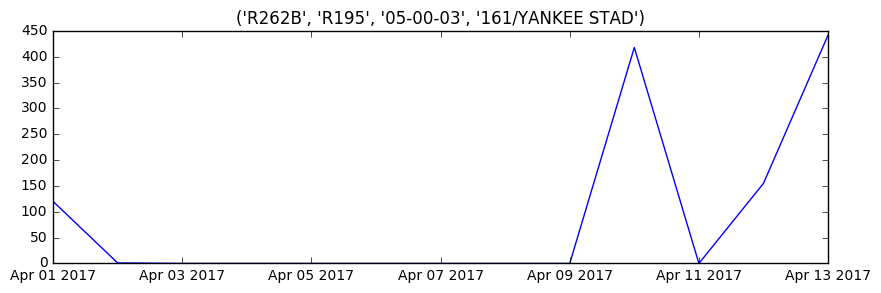

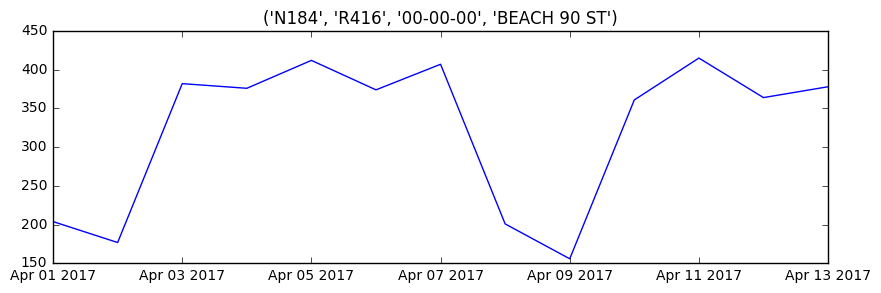

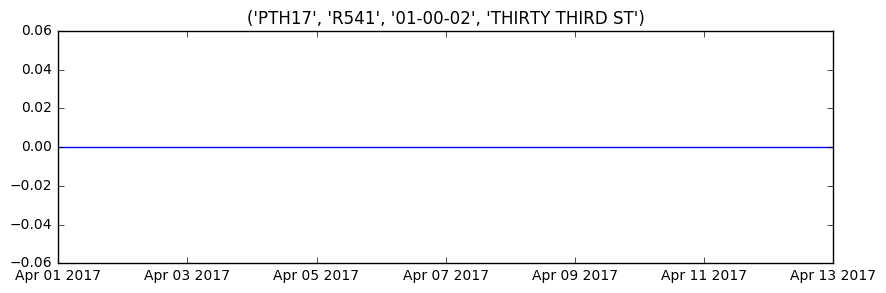

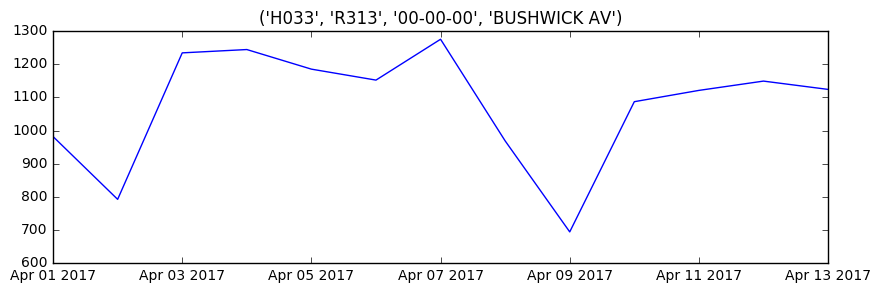

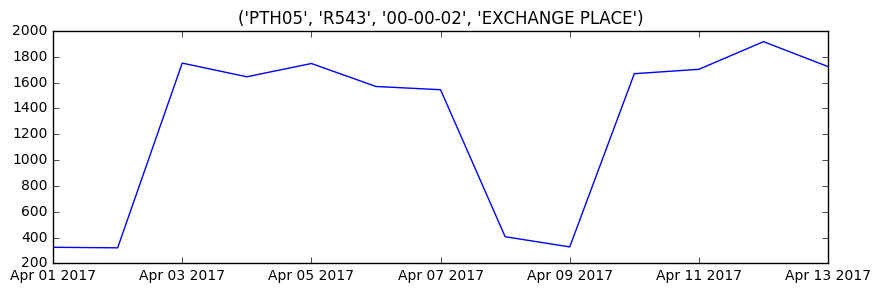

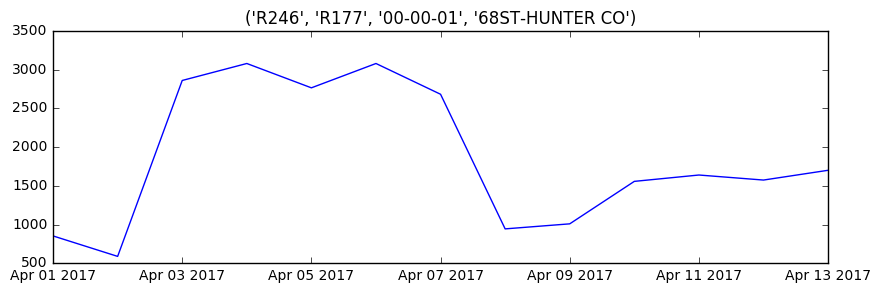

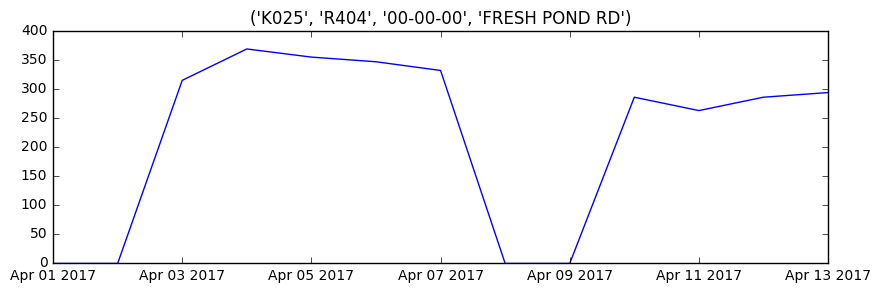

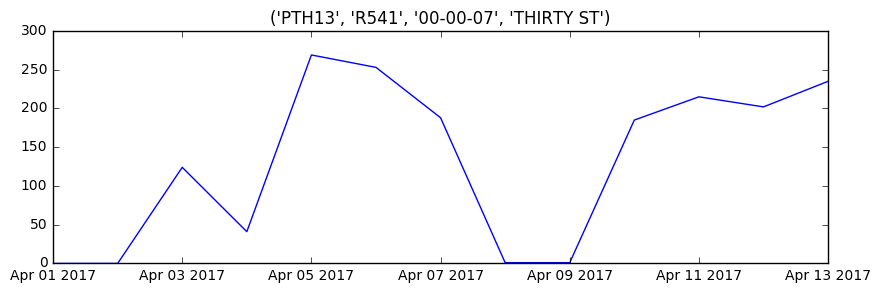

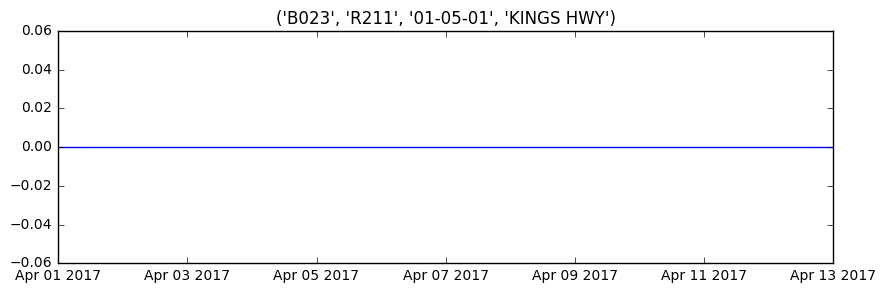

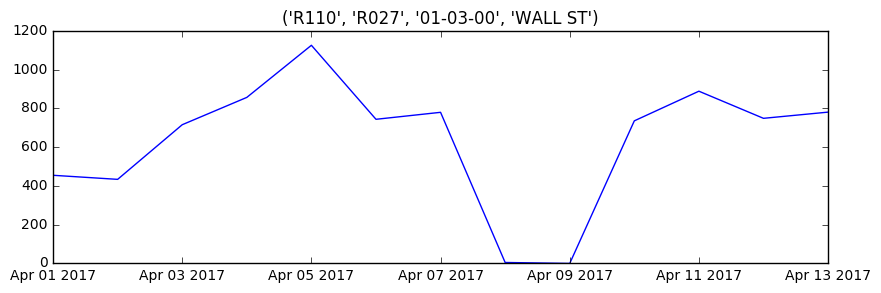

In [12]:
%matplotlib inline
import matplotlib.pyplot as plt

i=0
for k,v in data_days.items():
    if i<10:
        dates=[]
        counts=[]
        for items in v:
            dates.append(items[0])
            counts.append(items[1])
        plt.figure(figsize=(10,3))
        plt.plot(dates,counts)
        plt.title(k)
    i=i+1


## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


In [13]:
#solution1
data_aggr={}

for key,value in data_days.items():
    new_key=(key[0],key[1],key[3])
    if new_key not in data_aggr:
        data_aggr[new_key]=[]
    for items_new in value:
        date=items_new[0]
        count=items_new[1]
        found=0
        if data_aggr[new_key]:
            for items_old in data_aggr[new_key]:
                if items_old[0]==date:
                    found=1
                    items_old[1]=items_old[1]+count
        if found==0:
            data_aggr[new_key].append([date,count])

            
                    
            

In [ ]:
#solution 2
#why does the content of data_days change, if I would define data_aggr[new_key]like that: data_aggr[new_key]=value ?
data_aggr={}

for key,value in data_days.items():
    new_key=(key[0],key[1],key[3])
    if new_key not in data_aggr:
        data_aggr[new_key]=[]  # question: if  data_aggr[new_key]=value , why would the value of ata_days change?
    for new_values in value:
        found=0
        date=new_values[0]
        count=new_values[1]
        if data_aggr[new_key]:
            for i in range(len(data_aggr[new_key])):
                if data_aggr[new_key][i][0]==date:
                    data_aggr[new_key][i][1]=data_aggr[new_key][i][1]+count
                    found=1
        if found==0:
            data_aggr[new_key].append([date,count])
                

#print(data_aggr)

In [14]:
#check the results

for k,v in data_days.items():
    if k[0]=='R285' and k[1]=='R308' and k[3]=='MT EDEN AV':
        for item in v:
            if item[0]==datetime.date(2017, 4, 1):
                print (item)

print()

for k,v in data_aggr.items():
    if k[0]=='R285' and k[1]=='R308' and k[2]=='MT EDEN AV':
        for item in v:
            if item[0]==datetime.date(2017, 4, 1):
                print (item)

[datetime.date(2017, 4, 1), 708]
[datetime.date(2017, 4, 1), 739]
[datetime.date(2017, 4, 1), 784]
[datetime.date(2017, 4, 1), 935]

[datetime.date(2017, 4, 1), 3166]


In [ ]:
#print (data_aggr)

## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

In [15]:
data_station={}

for key_aggr,value_aggr in data_aggr.items():
    new_key=key_aggr[2]
    if new_key not in data_station:
        data_station[new_key]=[]
    for items_aggr in value_aggr:
        date=items_aggr[0]
        count=items_aggr[1]
        found=0
        if data_station[new_key]:
            for items_station in data_station[new_key]:
                if items_station[0]==date:
                    found=1
                    items_station[1]=items_station[1]+count
        if found==0:
            data_station[new_key].append([date,count])
#print (data_station)

{'BOROUGH HALL': [[datetime.date(2017, 4, 1), 13267], [datetime.date(2017, 4, 2), 10368], [datetime.date(2017, 4, 3), 40537], [datetime.date(2017, 4, 4), 40723], [datetime.date(2017, 4, 5), 42378], [datetime.date(2017, 4, 6), 39923], [datetime.date(2017, 4, 7), 38301], [datetime.date(2017, 4, 8), 17350], [datetime.date(2017, 4, 9), 13524], [datetime.date(2017, 4, 10), 35262], [datetime.date(2017, 4, 11), 35853], [datetime.date(2017, 4, 12), 36055], [datetime.date(2017, 4, 13), 36709]], '14 ST': [[datetime.date(2017, 4, 1), 34996], [datetime.date(2017, 4, 2), 30247], [datetime.date(2017, 4, 3), 54452], [datetime.date(2017, 4, 4), 55125], [datetime.date(2017, 4, 5), 58934], [datetime.date(2017, 4, 6), 56721], [datetime.date(2017, 4, 7), 57585], [datetime.date(2017, 4, 8), 33723], [datetime.date(2017, 4, 9), 26008], [datetime.date(2017, 4, 10), 50557], [datetime.date(2017, 4, 11), 55082], [datetime.date(2017, 4, 12), 54225], [datetime.date(2017, 4, 13), 56889]], 'BEVERLY RD': [[datetime.d

In [16]:
#check the results

for k,v in data_days.items():
    if  k[3]=='LEXINGTON AV/53':
        for item in v:
            if item[0]==datetime.date(2017, 4, 1):
                print (item, k[0], k[1],k[2])

print()

for k,v in data_aggr.items():
    if  k[2]=='LEXINGTON AV/53':
        for item in v:
            if item[0]==datetime.date(2017, 4, 1):
                print (item)
print()

for k,v in data_station.items():
    if  k=='LEXINGTON AV/53':
        for item in v:
            if item[0]==datetime.date(2017, 4, 1):
                print (item)

[datetime.date(2017, 4, 1), 1899] N306 R017 00-06-01
[datetime.date(2017, 4, 1), 3] N306 R017 00-00-04
[datetime.date(2017, 4, 1), 7] N305 R017 01-00-00
[datetime.date(2017, 4, 1), 14] N306 R017 00-03-02
[datetime.date(2017, 4, 1), 19] N305 R017 01-00-02
[datetime.date(2017, 4, 1), 226] N305 R017 01-03-00
[datetime.date(2017, 4, 1), -450] N305 R017 01-03-04
[datetime.date(2017, 4, 1), 226] N305A R016 00-00-00
[datetime.date(2017, 4, 1), 231] N305 R017 01-03-02
[datetime.date(2017, 4, 1), 8] N306 R017 00-00-02
[datetime.date(2017, 4, 1), 1] N305A R016 00-05-00
[datetime.date(2017, 4, 1), 136] N305A R016 00-00-01
[datetime.date(2017, 4, 1), 272] N305 R017 01-00-05
[datetime.date(2017, 4, 1), 2483] N306 R017 00-06-00
[datetime.date(2017, 4, 1), 0] N305A R016 00-05-01
[datetime.date(2017, 4, 1), 243] N305 R017 01-03-01
[datetime.date(2017, 4, 1), 75] N305 R017 01-00-03
[datetime.date(2017, 4, 1), 15] N306 R017 00-03-01
[datetime.date(2017, 4, 1), 14] N306 R017 00-00-03
[datetime.date(2017,

## Exercise 7
- Plot the time series for a station

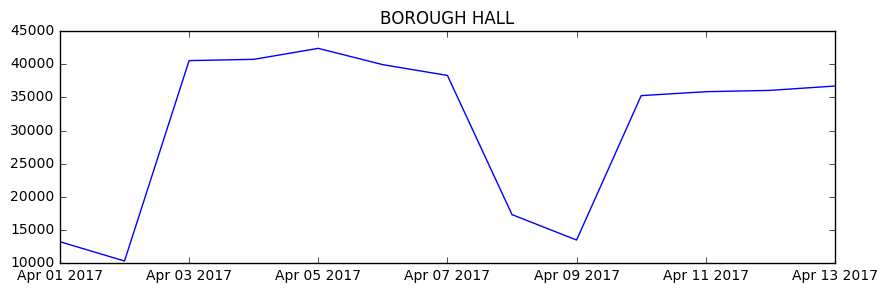

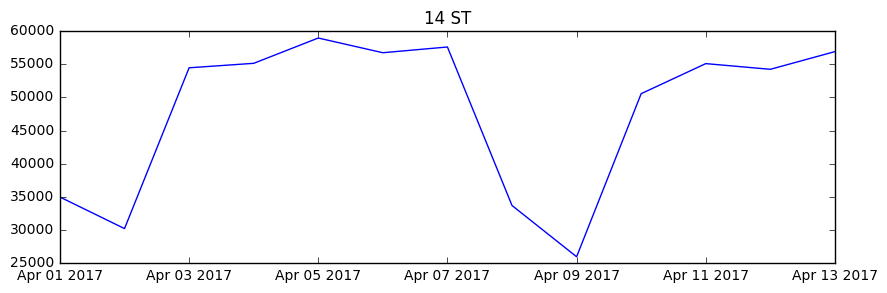

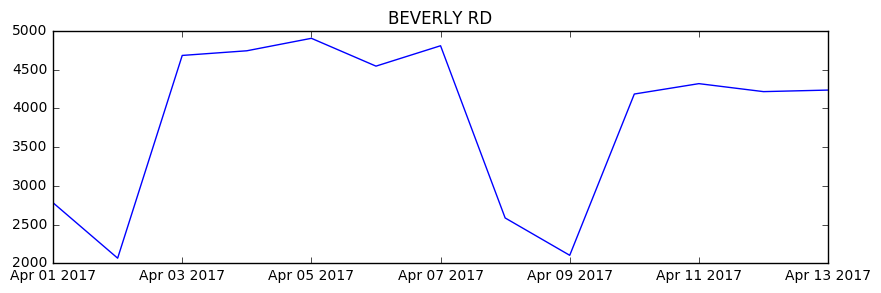

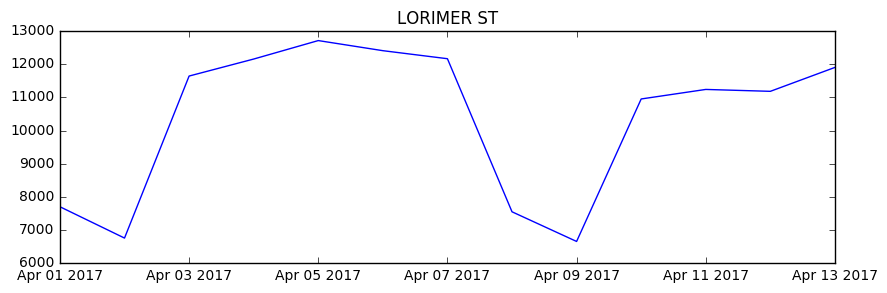

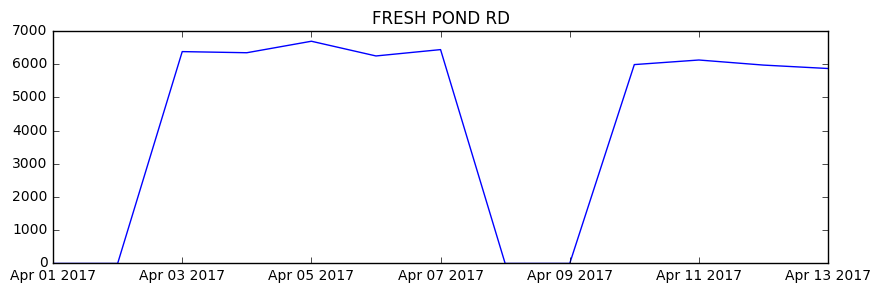

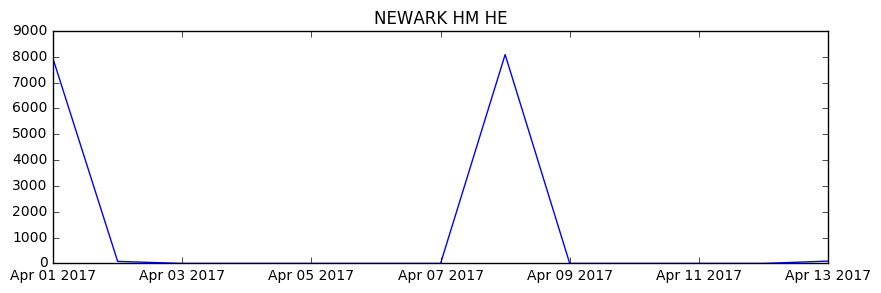

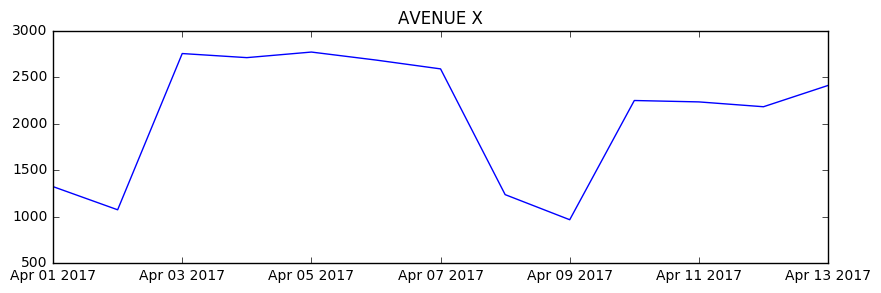

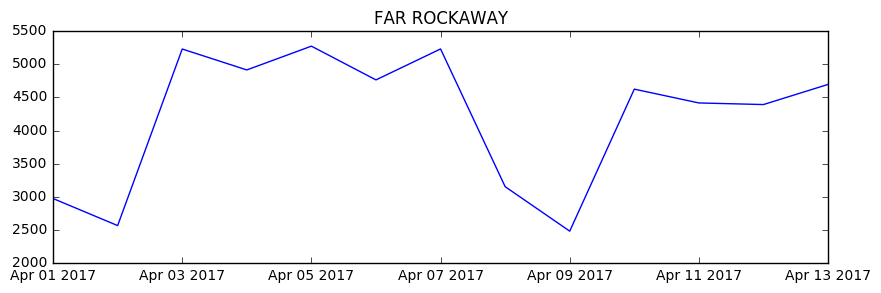

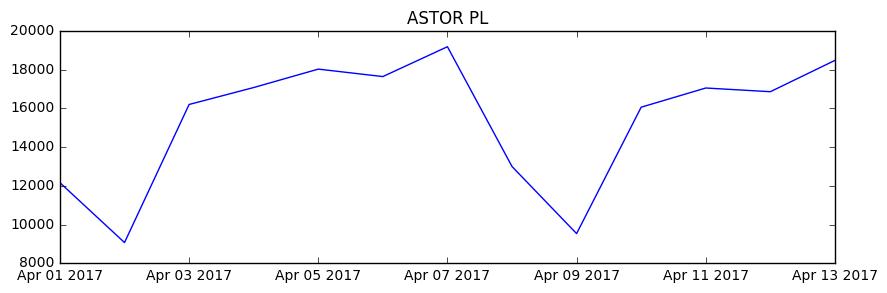

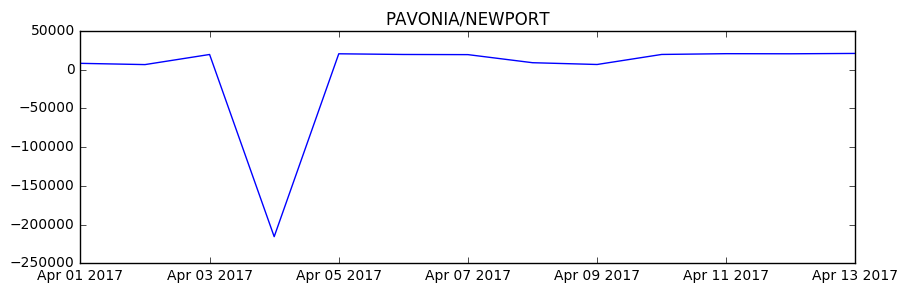

In [17]:

i=0
for k,v in data_station.items():
    if i<10:
        dates=[]
        counts=[]
        for items in v:
            dates.append(items[0])
            counts.append(items[1])
        plt.figure(figsize=(10,3))
        plt.plot(dates,counts)
        plt.title(k)
    i=i+1             

## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



In [18]:
#because of the difference I built, I have only 13 days....so I appended the last 6 days as well, like it would be a whole week
data_weekly={}

for key_station,value_station in data_station.items():
    data_weekly[key_station]=[]
    i=0
    new_list=[]
    for items_station in value_station:
        if i%7==0:
            if new_list:
                data_weekly[key_station].append(new_list)
            new_list=[]
        new_list.append(items_station[1])
        i=i+1
    data_weekly[key_station].append(new_list)
#print (data_weekly)

In [ ]:
i=0

plt.figure(figsize=(10,3))
for key_station,value_station in data_weekly.items():
    f,(ax1)=plt.subplots(10)
    while i<10:
        for items in value_station:
            plt.plot(items)
        plt.title(key_station)
        i=i+1

## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [19]:
data_sum={}

for key_w,value_w in data_weekly.items():
    data_sum[key_w]=0
    for counts in value_w:
        data_sum[key_w]=data_sum[key_w]+sum(counts)
print (data_sum)
        
        
    

{'BOROUGH HALL': 400250, '14 ST': 624544, 'BEVERLY RD': 50191, 'LORIMER ST': 135039, 'FRESH POND RD': 56050, 'NEWARK HM HE': 16179, 'AVENUE X': 27223, 'FAR ROCKAWAY': 54720, 'ASTOR PL': 200397, 'PAVONIA/NEWPORT': -23876, 'BROADWAY': 193546, 'JEFFERSON ST': 91243, 'AVENUE N': 28529, 'HUNTS POINT AV': 116052, '67 AV': 98164, 'ATL AV-BARCLAY': 500113, 'DELANCEY/ESSEX': 306506, 'EAST 105 ST': 43894, 'GRANT AV': 73411, 'BEACH 25 ST': 21703, '25 AV': 73185, 'BROADWAY JCT': 111670, '57 ST-7 AV': 337483, '169 ST': 100146, '155 ST': 76957, '72 ST': 569653, '157 ST': 129026, '3 AV 138 ST': 89618, 'FLUSHING AV': 130755, '14 ST-UNION SQ': 1249669, 'EAST BROADWAY': 167840, 'JAMAICA VAN WK': 61134, 'JUNCTION BLVD': 254041, '86 ST-2 AVE': 279538, 'DEKALB AV': 325007, 'SENECA AVE': 25139, 'SUTTER AV': 51767, 'BEACH 90 ST': 9456, '34 ST-HUDSON YD': 110289, '21 ST-QNSBRIDGE': 115841, '68ST-HUNTER CO': 255407, 'QUEENSBORO PLZ': 147070, 'ROCKAWAY AV': 127149, 'BOWERY': 49958, 'ASTORIA DITMARS': 195988, 'L

In [58]:
#highest traffic; --probably error.....

value = max(data_sum.values())
for k in data_sum.keys(): 
    if data_sum[k] == value:
        print (k,data_sum[k])

18 AV 1938661031


## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

In [38]:
#it looks like there are some extreme values.....
extreme_values=[]
for k,v in data_sum.items():
    if v<0 or v>10000000:
        extreme_values.append(k)
        print (k,v)
        
###########check these keys
#extreme_values=extreme_values[:1]
for extreme_stations in extreme_values:
    for k_extr,v_extr in data_days.items():
        if  k_extr[3]==extreme_stations:
            for items in v_extr:
                if items[1]<0 or items[1]>10000000:
                    print(k_extr)
                    for row in data[k_extr]:
                        print (row)

                        
#all the extreme values look like a data error   
    

PAVONIA/NEWPORT -23876
28 ST -2844150
NEW UTRECHT AV -4249343
145 ST -546997920
SUTPHIN BLVD -3830196
W 4 ST-WASH SQ -319582
18 AV 1938661031
4AV-9 ST -9706
MARBLE HILL-225 -50271128
72 ST-2 AVE -16494278
14TH STREET -229525
TIMES SQ-42 ST 67804543
57 ST 1920262070
('PTH06', 'R546', '00-00-06', 'PAVONIA/NEWPORT')
[datetime.datetime(2017, 4, 1, 1, 51, 48), 234814]
[datetime.datetime(2017, 4, 1, 6, 3, 48), 234814]
[datetime.datetime(2017, 4, 1, 10, 15, 48), 234814]
[datetime.datetime(2017, 4, 1, 14, 27, 48), 234814]
[datetime.datetime(2017, 4, 1, 18, 38, 3), 234816]
[datetime.datetime(2017, 4, 1, 22, 50, 3), 234820]
[datetime.datetime(2017, 4, 2, 3, 2, 3), 234821]
[datetime.datetime(2017, 4, 2, 7, 14, 3), 234821]
[datetime.datetime(2017, 4, 2, 11, 26, 3), 234821]
[datetime.datetime(2017, 4, 2, 15, 34), 234823]
[datetime.datetime(2017, 4, 2, 19, 46), 234826]
[datetime.datetime(2017, 4, 2, 23, 58), 234826]
[datetime.datetime(2017, 4, 3, 4, 10), 234826]
[datetime.datetime(2017, 4, 3, 8, 22)

In [53]:
#('D005', 'R398', '00-06-00', 'NEW UTRECHT AV')  
for row,values in result.items():
    if row[0]=='D005' and row[1]=='R398' and row[2]=='00-06-00' and row[3]=='NEW UTRECHT AV':
        for v in values:
            print(v)
        

['ND', 'BMT', '04/01/2017', '01:00:00', 'REGULAR', '0004773394', '0000602427']
['ND', 'BMT', '04/01/2017', '05:00:00', 'REGULAR', '0004773394', '0000602429']
['ND', 'BMT', '04/01/2017', '09:00:00', 'REGULAR', '0004773394', '0000602429']
['ND', 'BMT', '04/01/2017', '13:00:00', 'REGULAR', '0004773394', '0000602429']
['ND', 'BMT', '04/01/2017', '17:00:00', 'REGULAR', '0004773394', '0000602433']
['ND', 'BMT', '04/01/2017', '21:00:00', 'REGULAR', '0004773394', '0000602437']
['ND', 'BMT', '04/02/2017', '01:00:00', 'REGULAR', '0004773394', '0000602440']
['ND', 'BMT', '04/02/2017', '05:00:00', 'REGULAR', '0004773394', '0000602443']
['ND', 'BMT', '04/02/2017', '09:00:00', 'REGULAR', '0004773394', '0000602457']
['ND', 'BMT', '04/02/2017', '13:00:00', 'REGULAR', '0004773394', '0000602538']
['ND', 'BMT', '04/02/2017', '17:00:00', 'REGULAR', '0004773394', '0000602630']
['ND', 'BMT', '04/02/2017', '21:00:00', 'REGULAR', '0004773394', '0000602712']
['ND', 'BMT', '04/03/2017', '01:00:00', 'REGULAR', '

In [29]:
extreme_values=[]
for k,v in data_sum.items():
    if v<0 or v>10000000:
        extreme_values.append(k)
        print (k,v)
        
###########check these keys

for extreme_stations in extreme_values:
    print(data_station.get(extreme_stations))



for k,v in data.items():
    if  k[3]=='PAVONIA/NEWPORT' and k[0]=='PTH06' and k[1]=='R546' and k[2]=='00-00-06':
        for item in v:
            #if item[0]==datetime.date(2017, 4, 4):
            print (item, k[0], k[1],k[2])



for k,v in data_days.items():
    if  k[3]=='PAVONIA/NEWPORT':
        for item in v:
            if item[0]==datetime.date(2017, 4, 4):
                print (item, k[0], k[1],k[2])

print()

for k,v in data_aggr.items():
    if  k[2]=='PAVONIA/NEWPORT':
        for item in v:
            #if item[0]==datetime.date(2017, 4, 2):
            print (item)
print()

for k,v in data_station.items():
    if  k=='PAVONIA/NEWPORT':
        for item in v:
            #if item[0]==datetime.date(2017, 4, 2):
            print (item)        

PAVONIA/NEWPORT -23876
28 ST -2844150
NEW UTRECHT AV -4249343
145 ST -546997920
SUTPHIN BLVD -3830196
W 4 ST-WASH SQ -319582
18 AV 1938661031
4AV-9 ST -9706
MARBLE HILL-225 -50271128
72 ST-2 AVE -16494278
14TH STREET -229525
57 ST 1920262070
[datetime.datetime(2017, 4, 1, 1, 51, 48), 234814] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 1, 6, 3, 48), 234814] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 1, 10, 15, 48), 234814] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 1, 14, 27, 48), 234814] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 1, 18, 38, 3), 234816] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 1, 22, 50, 3), 234820] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 2, 3, 2, 3), 234821] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 2, 7, 14, 3), 234821] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 2, 11, 26, 3), 234821] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 2, 15, 34), 234823] PTH06 R546 00-00-06
[datetime.datetime(2017, 4, 2, 19, 46), 234826] PTH06

(array([ 20.,  43.,  40.,  46.,  34.,  17.,  21.,  18.,  12.,  17.,  14.,
          7.,   6.,  12.,   6.,   3.,   4.,   5.,   1.,   3.,   0.,   4.,
          2.,   1.,   2.,   1.,   2.,   0.,   0.,   1.,   1.,   0.,   1.,
          1.,   0.,   0.,   2.,   0.,   1.,   1.,   0.,   1.,   0.,   1.,
          0.,   1.,   0.,   1.,   0.,   1.]),
 array([   1171.  ,   20094.06,   39017.12,   57940.18,   76863.24,
          95786.3 ,  114709.36,  133632.42,  152555.48,  171478.54,
         190401.6 ,  209324.66,  228247.72,  247170.78,  266093.84,
         285016.9 ,  303939.96,  322863.02,  341786.08,  360709.14,
         379632.2 ,  398555.26,  417478.32,  436401.38,  455324.44,
         474247.5 ,  493170.56,  512093.62,  531016.68,  549939.74,
         568862.8 ,  587785.86,  606708.92,  625631.98,  644555.04,
         663478.1 ,  682401.16,  701324.22,  720247.28,  739170.34,
         758093.4 ,  777016.46,  795939.52,  814862.58,  833785.64,
         852708.7 ,  871631.76,  890554.82,  9

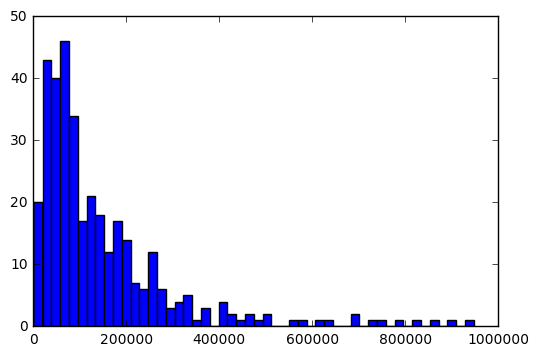

In [55]:
total_ridership=[]
for k,v in data_sum.items():
    if v>0 and v<1000000:
        total_ridership.append(v)

plt.hist(total_ridership, bins=50)
    

<Container object of 354 artists>

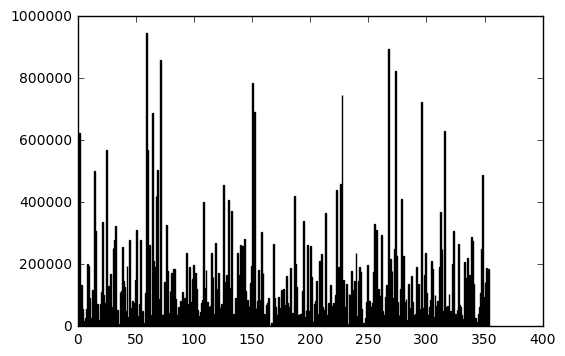

In [56]:
#with indices
indices = range(len(total_ridership))
plt.bar(indices, total_ridership)